<a href="https://colab.research.google.com/github/sh-ujif/-/blob/main/%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90%E3%81%AE%E5%AE%9F%E8%B7%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
stats.mannwhitneyu(group1['満足度'], group2['満足度'], alternative='two-sided')

MannwhitneyuResult(statistic=np.float64(8358463.5), pvalue=np.float64(4.346100522969403e-86))

帰無仮説 - 個人とグループの満足度には有意な差がない
対立　- 差はある

In [ ]:
stats.kstest(group2['満足度'],"norm",args=(group2['満足度'].mean(), group2['満足度'].std()))

KstestResult(statistic=np.float64(0.21983806393637373), pvalue=np.float64(5.4215464731543745e-289), statistic_location=np.int64(4), statistic_sign=np.int8(-1))

In [ ]:
# コルモゴロフ・スミルノフ検定
stats.kstest(group1['満足度'],"norm",args=(group1['満足度'].mean(), group1['満足度'].std()))

KstestResult(statistic=np.float64(0.20808304090584473), pvalue=np.float64(4.3587214678441367e-122), statistic_location=np.int64(3), statistic_sign=np.int8(-1))

In [ ]:
group1 = group.get_group('個人')
group2 = group.get_group('グループ')


In [ ]:
group = df.groupby('個人/グループ')
group['満足度'].agg(['mean', 'median'])

,mean,median
個人/グループ,,
グループ,3.331568,3.0
個人,2.926608,3.0


In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction=False)
print(f'χ 二乗値:{chi2}')
print(f'p 値:{p}')
print(f'自由度:{dof}')

χ 二乗値:7194.249228379877
p 値:0.0
自由度:20


In [ ]:
crosstab = pd.crosstab(df['満足度'], df['清潔さ'])
crosstab

清潔さ,0,1,2,3,4,5
満足度,,,,,,
1,0,348,35,7,2,1
2,0,601,884,310,129,52
3,1,270,561,1335,1005,394
4,0,50,97,646,1348,1208
5,0,3,2,73,125,513


In [ ]:
group = df.groupby('清潔さ')
group['満足度'].agg(['mean', 'median'])

,mean,median
清潔さ,,
0,3.000000,3.0
1,2.024371,2.0
2,2.459785,2.0
3,3.197385,3.0
4,3.561518,4.0
5,4.005535,4.0


In [ ]:
df = pd.read_csv('hotel_reviews.csv')
df.head()

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4


In [ ]:
# 清潔さの評価ごとの満足度の代表値
group = df.groupby('清潔さ')
group['満足度'].agg(['mean', 'median'])

,mean,median
清潔さ,,
0,3.000000,3.0
1,2.024371,2.0
2,2.459785,2.0
3,3.197385,3.0
4,3.561518,4.0
5,4.005535,4.0


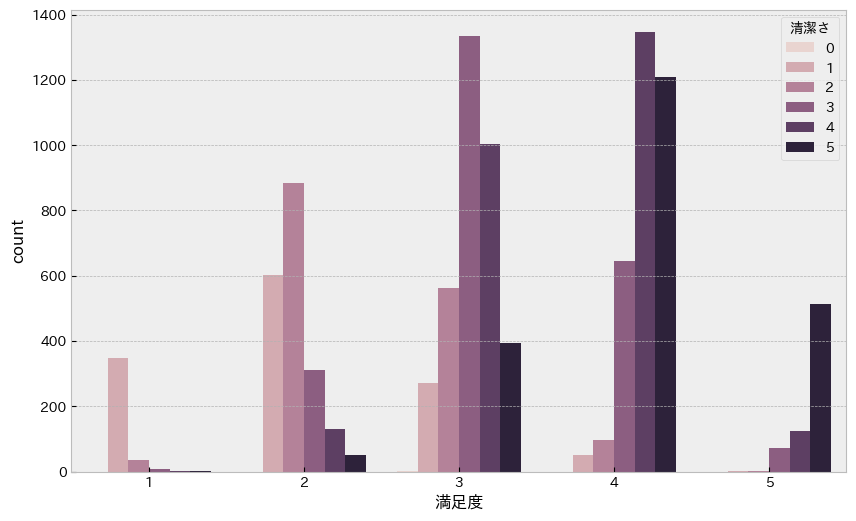

In [ ]:
sns.countplot(x='満足度', hue='清潔さ', data=df);

In [ ]:


data = pd.read_csv("/content/hotel_reviews.csv")
individual = data[data['個人/グループ'] == '個人']['満足度'].dropna()
group = data[data['個人/グループ'] == 'グループ']['満足度'].dropna()

# 数値データ以外を排除
individual = pd.to_numeric(individual, errors='coerce').dropna()
group = pd.to_numeric(group, errors='coerce').dropna()

# t検定の実行（等分散でないため equal_var=False）
t_stat, p_value = stats.ttest_ind(individual, group, equal_var=False)

# 結果の表示
print(f"個人の満足度平均: {individual.mean():.2f}")
print(f"グループの満足度平均: {group.mean():.2f}")
print(f"t値: {t_stat:.2f}, p値: {p_value:.5f}")

# 有意水準（α）の設定
alpha = 0.05
if p_value < alpha:
    print("帰無仮説を棄却（統計的に有意な差あり）")
else:
    print("帰無仮説を採択（統計的に有意な差なし）")

個人の満足度平均: 2.93
グループの満足度平均: 3.33
t値: -20.39, p値: 0.00000
帰無仮説を棄却（統計的に有意な差あり）


In [ ]:
stats.kstest(group2['満足度'],"norm",args=(group2['満足度'].mean(), group2['満足度'].std()))


KstestResult(statistic=np.float64(0.21983806393637373), pvalue=np.float64(5.4215464731543745e-289), statistic_location=np.int64(4), statistic_sign=np.int8(-1))

In [ ]:
# コルモゴロフ・スミルノフ検定　p値が０．０５より大きいから正規分布

stats.kstest(group1['満足度'],"norm",args=(group1['満足度'].mean(), group1['満足度'].std()))


KstestResult(statistic=np.float64(0.20808304090584473), pvalue=np.float64(4.3587214678441367e-122), statistic_location=np.int64(3), statistic_sign=np.int8(-1))

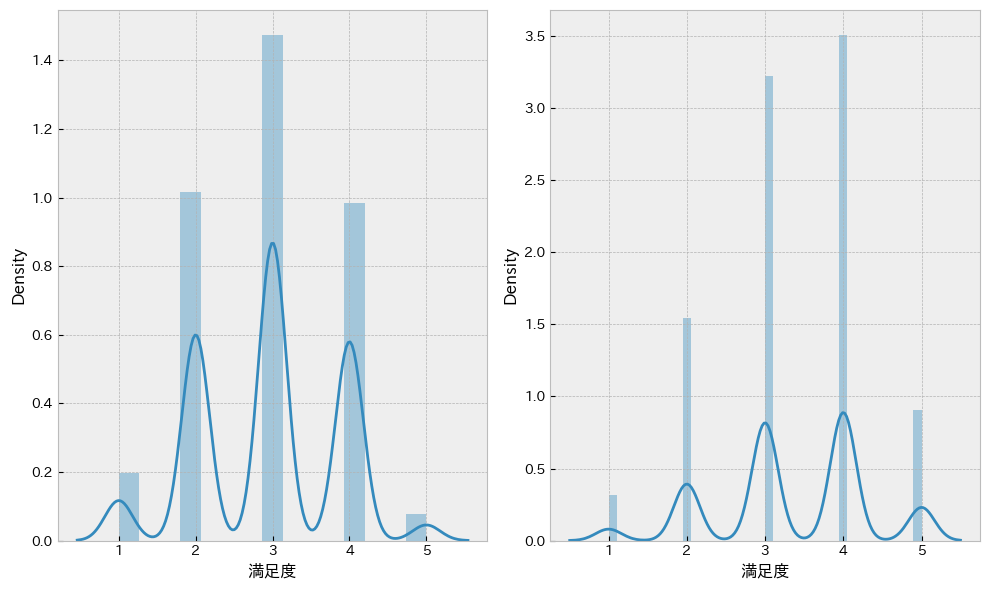

In [ ]:
# 可視化
plt.subplot(1, 2, 1)
sns.distplot(group1['満足度'])
plt.subplot(1, 2, 2)
sns.distplot(group2['満足度'])
plt.tight_layout()

In [ ]:
group1 = group.get_group('個人')
group2 = group.get_group('グループ')


仮説
 -個人とグループで満足度に差がある

In [ ]:
group = df.groupby(group = df.groupby('性別')
group['満足度'].agg(['mean', 'median'])')
group['満足度'].agg(['mean', 'median'])

,mean,median
個人/グループ,,
グループ,3.331568,3.0
個人,2.926608,3.0


In [ ]:
#結論、Wi-Fiと満足度には何らかの関連があり、さらに、Wi-Fi評価３以下と４以上でさらに差がある

In [ ]:
stats.mannwhitneyu(satis_0['満足度'], satis_1['満足度'], alternative='two-sided')


MannwhitneyuResult(statistic=np.float64(4353567.0), pvalue=np.float64(0.0))

In [ ]:
print(stats.kstest(satis_0['満足度'], "norm", args=(group1['満足度'].mean(), group1['満足度'].std())))
print(stats.kstest(satis_1['満足度'], "norm", args=(group1['満足度'].mean(), group1['満足度'].std())))

KstestResult(statistic=np.float64(0.317339652392472), pvalue=np.float64(0.0), statistic_location=np.int64(3), statistic_sign=np.int8(1))
KstestResult(statistic=np.float64(0.53762870136225), pvalue=np.float64(0.0), statistic_location=np.int64(4), statistic_sign=np.int8(-1))


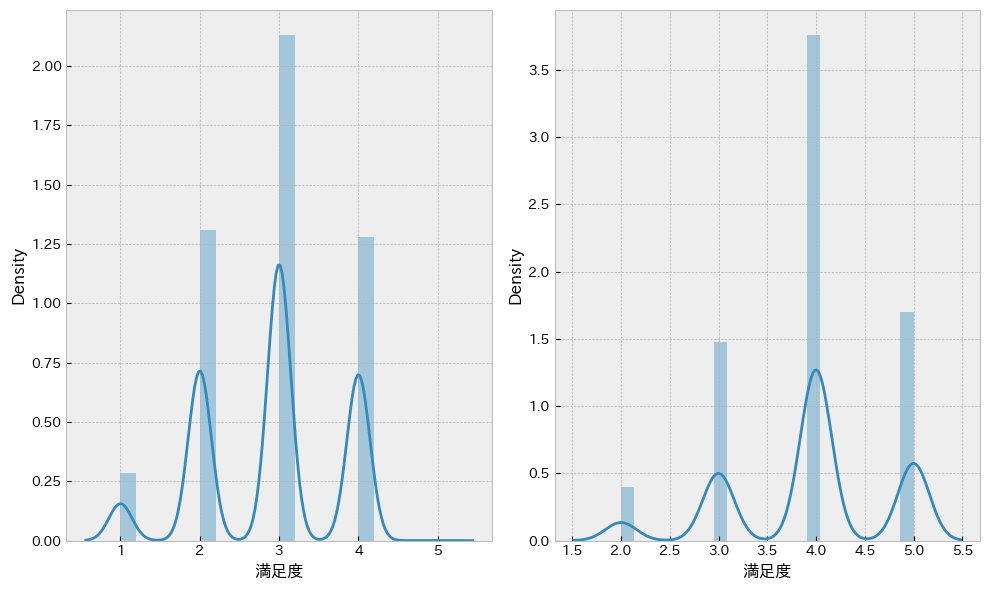

In [ ]:
plt.subplot(1, 2, 1)
sns.distplot(satis_0['満足度'])
plt.subplot(1, 2, 2)
sns.distplot(satis_1['満足度'])
plt.tight_layout()


仮説建てWi-Fi３以下と４以上で差がある

In [ ]:
print(f'Wifi設備3以下：{satis_0["満足度"].mean()}')
print(f'Wifi設備4以上：{satis_1["満足度"].mean()}')

Wifi設備3以下：2.880694143167028
Wifi設備4以上：3.9218800648298218


In [ ]:
satis_1 = df.query('Wifi設備>=4')
satis_1.head(3)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4


In [ ]:
satis_0 = df.query('Wifi設備<=3')#.query() で特定の数値を抜き出す
satis_0.head(3)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3
5,男性,52,グループ,学生,2,3,3,3,2,2,1,3,2,2


検定の結果、p値が下回ったので何らかの関連がある

In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction=False)
print(f'χ 二乗値:{chi2}')
print(f'p 値:{p}')
print(f'自由度:{dof}')

χ 二乗値:5356.10247526457
p 値:0.0
自由度:16


In [ ]:
# 関数化しておく
crosstab = pd.crosstab(df['満足度'], df['Wifi設備'])
crosstab


Wifi設備,1,2,3,4,5
満足度,,,,,
1,289,96,8,0,0
2,535,835,439,155,12
3,749,1043,1152,458,164
4,190,542,1036,1149,432
5,0,0,1,226,489


仮説　Wi-Fiと満足度は何らかの関連性がある
χにじょう検定


In [ ]:
# WiFi設備の評価ごとの満足度の代表値
group = df.groupby('Wifi設備')
group['満足度'].agg(['mean', 'median'])

,mean,median
Wifi設備,,
1,2.476461,3.0
2,2.807234,3.0
3,3.221168,3.0
4,3.727364,4.0
5,4.274385,4.0


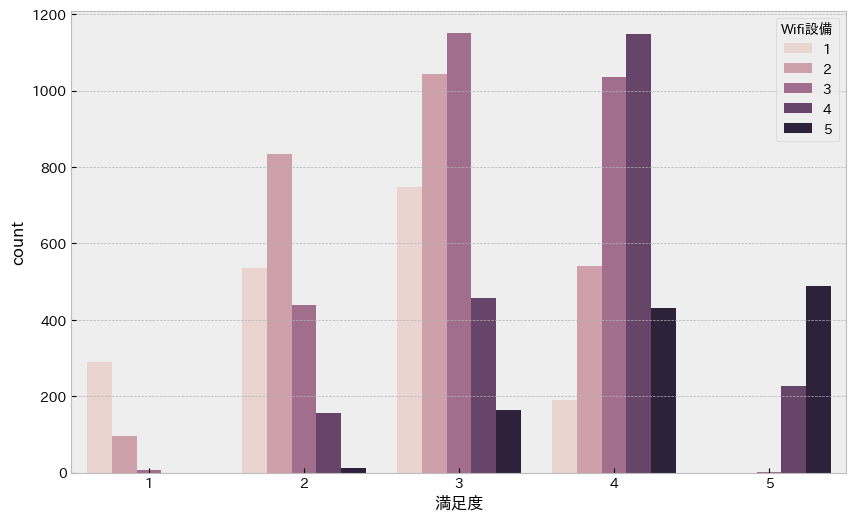

In [ ]:
sns.countplot(x='満足度', hue='Wifi設備', data=df);

In [ ]:
stats.mannwhitneyu(group1['満足度'], group2['満足度'], alternative='two-sided')#マンホイットニーの結果　p値は有意水準超え


MannwhitneyuResult(statistic=np.float64(12311050.0), pvalue=np.float64(0.1708277786931579))

- 帰無仮説、男女で平均に差はない
- 対立仮説、男女で平均に差がある
- 有意水準５％

In [ ]:
stats.kstest(group1['満足度'],"norm",args=(group1['満足度'].mean(), group1['満足度'].std()))


KstestResult(statistic=np.float64(0.20191525204455174), pvalue=np.float64(4.5382865989037923e-178), statistic_location=np.int64(4), statistic_sign=np.int8(-1))

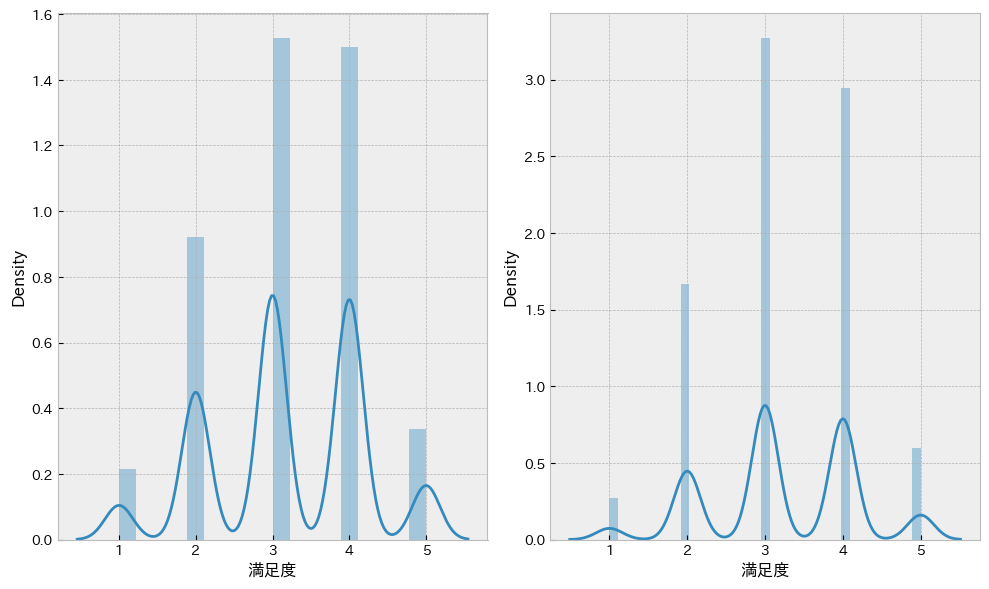

In [ ]:
plt.subplot(1, 2, 1)
sns.distplot(group1['満足度'])
plt.subplot(1, 2, 2)
sns.distplot(group2['満足度'])
plt.tight_layout()

In [ ]:
group1.head(3)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4
5,男性,52,グループ,学生,2,3,3,3,2,2,1,3,2,2


In [ ]:
group1 = group.get_group('男性')
group2 = group.get_group('女性')

仮説建て
男女で満足度に差はあるのか

In [ ]:
group = df.groupby('性別')
group['満足度'].agg(['mean', 'median'])

,mean,median
性別,,
女性,3.219638,3.0
男性,3.183940,3.0


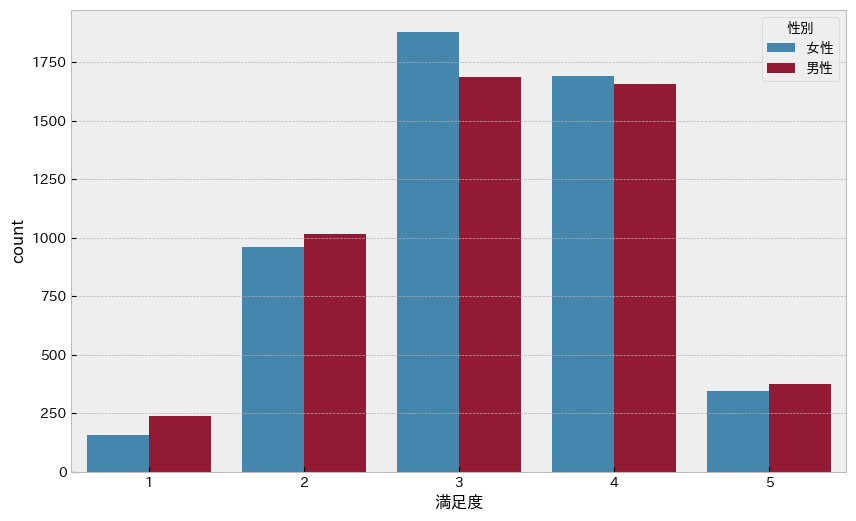

In [ ]:
sns.countplot(x='満足度', hue='性別', data=df);

In [ ]:
df = pd.read_csv('hotel_reviews.csv')
df.head()

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import japanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 6


In [ ]:
!pip install -q japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 52.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
